In [10]:
#Import Libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

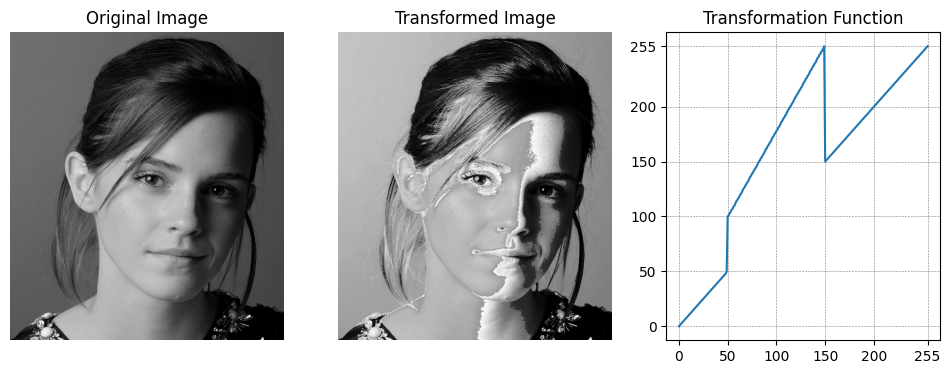

In [ ]:
c = np.array([(50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

t1 = np.linspace(0, c[0,1], c[0,0]).astype('uint8')                 #from 0 to 49 = 50 parts
t2 = np.linspace(c[1,1], c[2,1], c[2,0] - c[1,0]).astype('uint8')   #from 50 to 149 = 100 parts 
t3 = np.linspace(c[3,1], c[4,1], c[4,0] - c[3,0] + 1).astype('uint8') #from 150 to 255 = 106 parts

#Concatenate the three parts to form the complete transformation
transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')

#transform the image using the transformation function
f = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
g = transform[f]
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
for a in ax[0:2]:
    a.axis('off')
ax[2].plot(transform)
ax[2].set_xticks(list(np.arange(0, 201, 50)) + [255])  # Custom x-ticks (0,50,100,...,200,255)
#ax[2].set_xticks(np.arange(0, 256, 10), minor=True)  # Minor ticks for finer grid
ax[2].set_yticks(list(np.arange(0, 201, 50)) + [255])  # Custom y-ticks (0,50,100,...,200,255)
#ax[2].set_yticks(np.arange(0, 256, 10), minor=True)  # Minor ticks
ax[2].set_title('Transformation Function')
#show grid
ax[2].grid(which='both', color='gray', linestyle='--', linewidth=0.4)
plt.show()

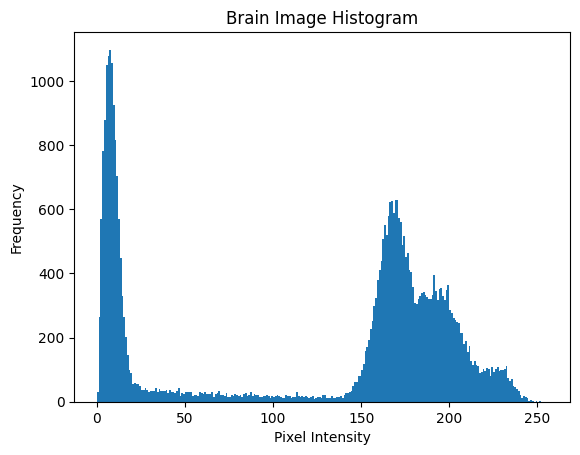

In [14]:
# Load the brain image in grayscale
brain_img = cv2.imread('a1images/brain_proton_density_slice.png', cv2.IMREAD_GRAYSCALE)
plt.hist(brain_img.ravel(), bins=256, range=(0, 256))
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Brain Image Histogram')
plt.show()

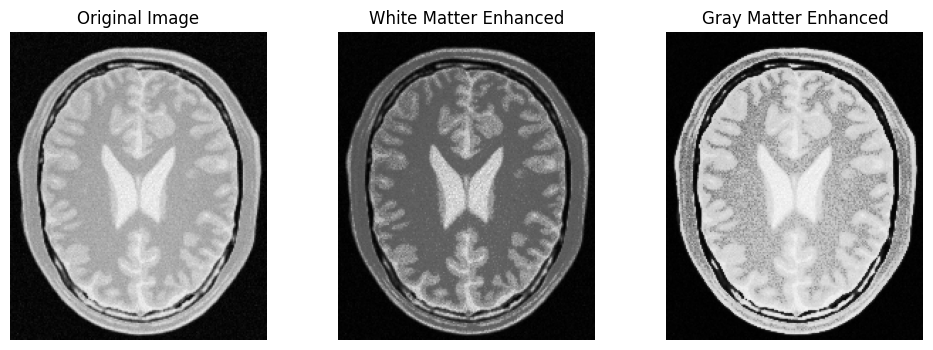

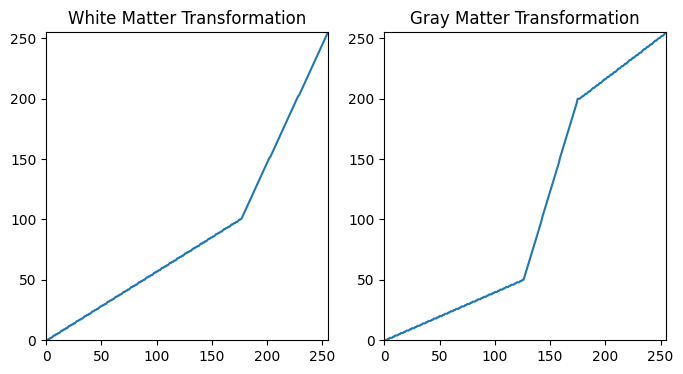

In [38]:
# White Matter Transformation
t1_wm = np.linspace(0, 100, 176).astype('uint8')  
t2_wm = np.linspace(100, 255, 80).astype('uint8')  
transform_wm = np.concatenate((t1_wm, t2_wm), axis=0).astype('uint8')

# Gray Matter Transformation
t1_gm = np.linspace(0, 50, 126).astype('uint8') 
t2_gm = np.linspace(50, 200, 50).astype('uint8')  
t3_gm = np.linspace(200, 255, 80).astype('uint8')  
transform_gm = np.concatenate((t1_gm, t2_gm, t3_gm), axis=0).astype('uint8')

# Load and transform the image 
f = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
g_wm = transform_wm[f]  # Apply white matter transformation
g_gm = transform_gm[f]  # Apply gray matter transformation

# Matplotlib plots (similar to sample code)
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(g_wm, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('White Matter Enhanced')
ax[2].imshow(g_gm, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Gray Matter Enhanced')
for a in ax:
    a.axis('off')
plt.show()

# Transformation plots
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(transform_wm)
ax[0].set_ylim([0, 255])
ax[0].set_xlim([0, 255])
ax[0].set_title('White Matter Transformation')
ax[1].plot(transform_gm)
ax[1].set_ylim([0, 255])
ax[1].set_xlim([0, 255])
ax[1].set_title('Gray Matter Transformation')
plt.show()